In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [29]:
k_data_path = os.path.join(os.pardir, 'Data', 'K-Data.csv')
k_data = pd.read_csv(k_data_path)

v1_data = k_data[k_data.region == 'V1']

C:\Users\maxro\AppData\Local\Temp\ipykernel_3744\64341008.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  k_data = pd.read_csv(k_data_path)


,m,s,e,u,grat_orientation,grat_contrast,grat_spat_freq,grat_phase,response,smoothed_response,region,unit_type,response_type,invariance,fit_quality,c_inv_ts
633276,PVCre_2019_0009,4,5,87,165,1.0,0.332966,270,0.003996,0.003596,V1,excit,rising,invariant,good,2021-05-21 14:57:08
633277,PVCre_2019_0009,4,5,87,165,1.0,0.799834,0,0.001998,0.002198,V1,excit,rising,invariant,good,2021-05-21 14:57:08
633278,PVCre_2019_0009,4,5,87,165,1.0,0.799834,90,0.000000,0.000000,V1,excit,rising,invariant,good,2021-05-21 14:57:08
633279,PVCre_2019_0009,4,5,87,165,1.0,0.799834,180,0.002663,0.002929,V1,excit,rising,invariant,good,2021-05-21 14:57:08
633280,PVCre_2019_0009,4,5,87,165,1.0,0.799834,270,0.011976,0.011976,V1,excit,rising,invariant,good,2021-05-21 14:57:08


Data type warning because some unit_type are NaN

In [53]:
orientations = v1_data.grat_orientation.unique()
contrasts = v1_data.grat_contrast.unique()
spatial_frequencies = v1_data.grat_spat_freq.unique()
phases = v1_data.grat_phase.unique()
v1_data.u.unique()

array([  6,  19,  21,  36,  54,  58,  59,  66,  99, 150,   2,   3,  55,
        65,  10,  35,  52,  79,   8,  14,  20,  25,  30,  67,  77,   5,
         7,   9,  12,  13,  16,  17,  18,  22,  23,  24,  27,  29,  34,
        38,  51,   4,  11,  15,  28,  31,  32,  33,  37,  39,  42,  43,
        44,  45,  47,  49,  50,  56,  57,  60,  62,  63,  64,  68,  69,
        70,  72,  73,  74,  80,  81,  84,  87,  89,  90,  91,  92,  46,
        53,  71,  78,  82,  83,  86], dtype=int64)

The following code defines a function to construct a matrix of responses with varying orientation and contrast. It requires a unit, u, to be specified. A given grating spatial frequency or phase can be specified, otherwise all values will be averaged over.

In [86]:
def oc_matrix(u, freq=None, phase=None):
    u_data = v1_data[v1_data.u == u]
    
    if freq is not None:
        u_data = u_data[u_data.grat_spat_freq == freq]
    if phase is not None:
        u_data = u_data[u_data.grat_phase == phase]
    
    M = np.zeros((len(orientations), len(contrasts)))
    
    for i, th in enumerate(orientations):
        ori_data = u_data[u_data.grat_orientation == th]
        for j, c in enumerate(contrasts):
            con_data = ori_data[ori_data.grat_contrast == c]
            
            M[i,j] = np.mean(con_data.response)
            
    return M

The following function plots a heatmap of the firing rates in the given matrix.

In [90]:
def oc_heatmap(M):
    fig, ax = plt.subplots()
    im = ax.imshow(M, cmap='hot', interpolation='nearest')

    ax.set_yticks(np.arange(len(orientations)), labels = orientations)
    ax.set_xticks(np.arange(len(contrasts)), labels = contrasts)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")


    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Firing Rate (Hz)', rotation=-90, va="bottom")

    ax.set_xlabel('Contrast')
    ax.set_ylabel('Orientation (deg)')


    plt.show()

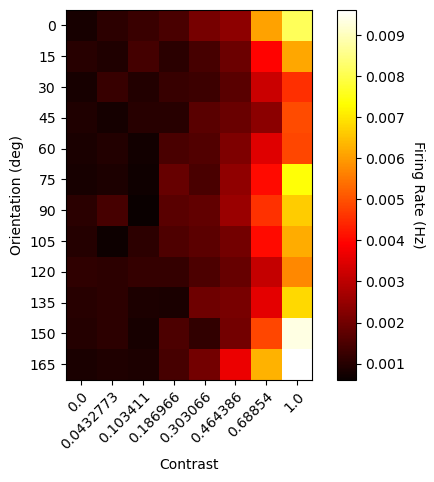

In [103]:
M = oc_matrix(2)
oc_heatmap(M)

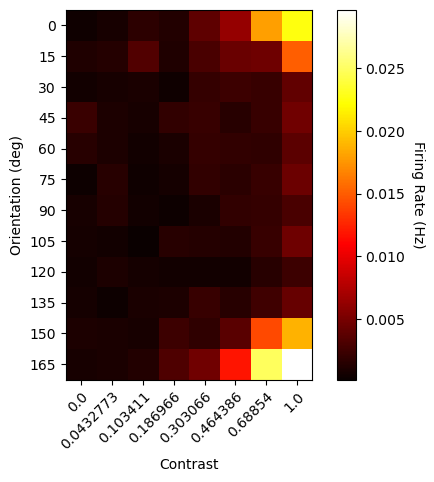

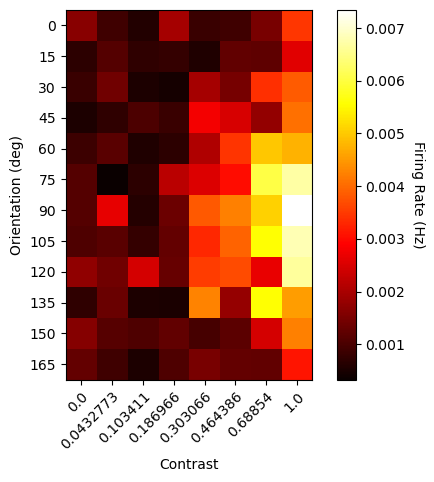

In [104]:
M = oc_matrix(2, spatial_frequencies[2])
oc_heatmap(M)
M = oc_matrix(2, spatial_frequencies[4])
oc_heatmap(M)